# Lab 4 – Doing regression.
Here is what we will do:
1. Prepare the data
2. Train and analyze a linear regression
     - single input feature
     - multiple input features
3. Train and analyze a polynomial regression
4. Train and analyze a regularized model

### Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

In [7]:
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


### Quick look at distributions:

In [8]:
 print(howell_full.head(n=10))
print(howell_full.describe())
howell_full.corr()

    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
5  163.830  62.992589  35.0     1
6  149.225  38.243476  32.0     0
7  168.910  55.479971  27.0     1
8  147.955  34.869885  19.0     0
9  165.100  54.487739  54.0     1
           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000


,height,weight,age,male
height,1.000000,0.940822,0.683689,0.139229
weight,0.940822,1.000000,0.678335,0.155443
age,0.683689,0.678335,1.000000,0.005887
male,0.139229,0.155443,0.005887,1.000000


### Quick Visualization

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='age', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='age', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>]], dtype=object)

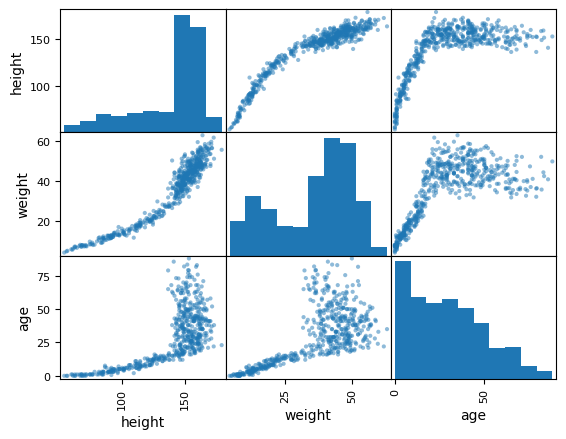

In [9]:
from pandas.plotting import  scatter_matrix
attributes = ['height', 'weight', 'age']
scatter_matrix(howell_full[attributes])

### A Better Plot

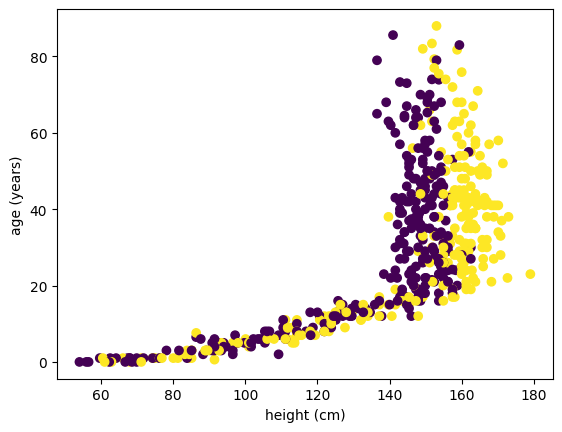

In [15]:
import matplotlib.pyplot as plt
height = howell_full['height']
age = howell_full['age']
gender = howell_full['male']
plt.scatter(height, age, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('age (years)')
plt.show()

### Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

In [16]:
# create a new feature with the name new
howell_full['new'] = howell_full['male'] + howell_full['age']
howell_full.info()

# get rid of the new feature
howell_full.drop(axis='columns', labels='new', inplace=True)
howell_full.info()

# remove rows that are missing values
howell_full.dropna(axis='index', how="any", inplace=True)

height_median = howell_full['height'].median()
weight_average = howell_full['weight'].mean()

# replace missing values by median or average (or any arbitrary value)
howell_full['height'].fillna(height_median, inplace=True)
howell_full['weight'].fillna(weight_average, inplace=True)
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   new     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    fl

/var/folders/tj/z4grz_bx03z_64mdfjbtc1lh0000gn/T/ipykernel_57035/2979336195.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  howell_full['height'].fillna(height_median, inplace=True)
/var/folders/tj/z4grz_bx03z_64mdfjbtc1lh0000gn/T/ipykernel_57035/2979336195.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

### Adding a New Feature

In [17]:
# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)
print(bmi(150, 40))
new_feature = bmi(howell_full['height'], howell_full['weight'])
print(new_feature)
howell_full['bmi'] = new_feature
howell_full.head(n=10)

17.77777777777778
0      20.764297
1      18.695244
2      17.095718
3      21.561444
4      19.520384
         ...    
539    14.720729
540    19.739486
541    22.155341
542    15.917698
543    20.844590
Length: 544, dtype: float64


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

In [19]:
import numpy as np
def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
print(howell_full.head(n=10))
howell_full['bmi class'].value_counts()

    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal


bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

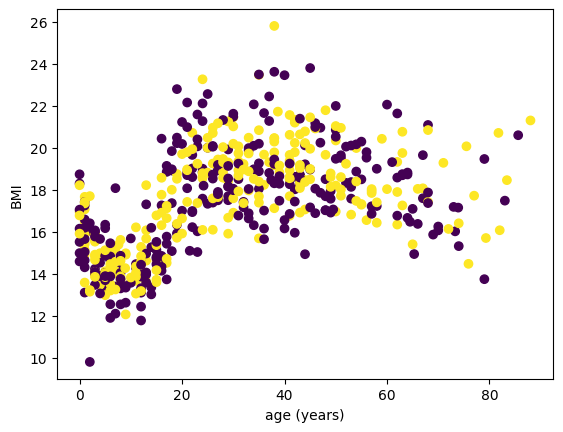

In [20]:
import matplotlib.pyplot as plt
age = howell_full['age']
bmi = howell_full['bmi']
gender = howell_full['male']
plt.scatter(age, bmi, c=gender)
plt.xlabel('age (years)')
plt.ylabel('BMI')
plt.show()

### Splitting the Data by Age

In [21]:
over18 = howell_full["age"] > 18
print(over18)
# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18]       # ~ is not in numpy
print("There are ", len(howell_adults), " adult instances")
print(howell_adults)
print("There are ", len(howell_children), " child instances")
print(howell_children)

0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool
There are  346  adult instances
      height     weight   age  male        bmi    bmi class
0    151.765  47.825606  63.0     1  20.764297       Normal
1    139.700  36.485807  63.0     0  18.695244       Normal
2    136.525  31.864838  65.0     0  17.095718  Underweight
3    156.845  53.041914  41.0     1  21.561444       Normal
4    145.415  41.276872  51.0     0  19.520384       Normal
..       ...        ...   ...   ...        ...          ...
534  162.560  47.031821  27.0     0  17.797722  Underweight
537  142.875  34.246196  31.0     0  16.776442  Underweight
540  162.560  52.163080  31.0     1  19.739486       Normal
541  156.210  54.062497  21.0     0  22.155341       Normal
543  158.750  52.531624  68.0     1  20.844590       Normal

[346 rows x 6 columns]
There are  198  child instances
      height 

### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

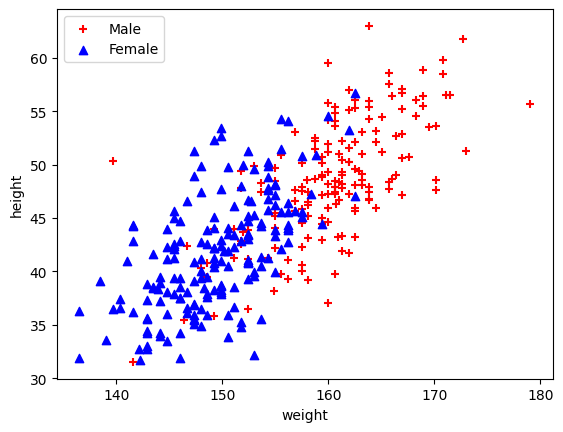

In [22]:
import matplotlib.pyplot as plt
male_height = np.ma.masked_where(howell_adults['male']==0,
                     howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1,
                     howell_adults['height'])
weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

### Train/Test Data Split

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(howell_adults,
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))
print('Adult counts', howell_adults['male'].value_counts())
print('Train counts', train_set['male'].value_counts())
print('Test counts', test_set['male'].value_counts())

Train size:  276 Test size:  70
Adult counts male
0    182
1    164
Name: count, dtype: int64
Train counts male
0    141
1    135
Name: count, dtype: int64
Test counts male
0    41
1    29
Name: count, dtype: int64


In [27]:
# Define the counts
adult_male_count = 164
adult_female_count = 182

train_male_count = 135
train_female_count = 141

test_male_count = 29
test_female_count = 41

# Calculate the ratios
adult_ratio = adult_male_count / adult_female_count
train_ratio = train_male_count / train_female_count
test_ratio =  test_male_count / test_female_count

# Convert ratios to percentages
adult_ratio_percentage = adult_ratio * 100
train_ratio_percentage = train_ratio * 100
test_ratio_percentage = test_ratio * 100

# Print the percentage with formatting
print(f"Adult Male to Female Ratio: {adult_ratio_percentage:.0f}%")
print(f"Train Male to Female Ratio: {train_ratio_percentage:.0f}%")
print(f"Test Male to Female Ratio: {test_ratio_percentage:.0f}%")



Adult Male to Female Ratio: 90%
Train Male to Female Ratio: 96%
Test Male to Female Ratio: 71%


### Stratified Test/Train Data Split

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                                  random_state=123)
for train_indices, test_indices in splitter.split(howell_adults,
                                        howell_adults['male']):
  train_set = howell_adults.iloc[train_indices]
  test_set = howell_adults.iloc[test_indices]
print('Train size: ', len(train_set), 'Test size: ', len(test_set))
print('Adult counts', howell_adults['male'].value_counts())
print('Train counts', train_set['male'].value_counts())
print('Test counts', test_set['male'].value_counts())

Train size:  276 Test size:  70
Adult counts male
0    182
1    164
Name: count, dtype: int64
Train counts male
0    145
1    131
Name: count, dtype: int64
Test counts male
0    37
1    33
Name: count, dtype: int64


In [29]:
# Define the counts
adult_male_count = 164
adult_female_count = 182

train_male_count = 131
train_female_count = 145

test_male_count = 33
test_female_count = 37

# Calculate the ratios
adult_ratio = adult_male_count / adult_female_count
train_ratio = train_male_count / train_female_count
test_ratio =  test_male_count / test_female_count

# Convert ratios to percentages
adult_ratio_percentage = adult_ratio * 100
train_ratio_percentage = train_ratio * 100
test_ratio_percentage = test_ratio * 100

# Print the percentage with formatting
print(f"Adult Male to Female Ratio: {adult_ratio_percentage:.0f}%")
print(f"Train Male to Female Ratio: {train_ratio_percentage:.0f}%")
print(f"Test Male to Female Ratio: {test_ratio_percentage:.0f}%")

Adult Male to Female Ratio: 90%
Train Male to Female Ratio: 90%
Test Male to Female Ratio: 89%
